In [1]:
from datetime import datetime, timedelta
import json
from math import ceil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from models.qp.qpercent import QPercent
from util.batcher import Batcher
from util.stock_loader import Loader

In [2]:
!ls ../models/qp

__pycache__ data        qpercent.py


In [3]:
SD = 0.05 * (0.8 ** 1) # -4 ... 10 
print('SD:', SD)

SD: 0.04000000000000001


In [4]:
DATA = '../models/qp/data'
SYMBOLS = [
    'ABMD', 'ABNB', 'ANET', 'ATVI', 'AXON', 'AYX', 'BILI', 'BYND', 'COUR', 'CPNG', 'DDOG', 
    'DOCU', 'EDIT', 'ETSY', 'FSLY', 'FUV', 'GH', 'GMED', 'INTG', 'ISRG', 'JD', 'LULU', 
    'LUV', 'MDB', 'MELI', 'MNST', 'MTCH', 'NVCR', 'OKTA', 'PANW', 'PINS', 'PTON', 'QDEL', 
    'RDFN', 'RGEN', 'ROKU', 'SE', 'SHOP', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 
    'TWTR', 'VEEV', 'ZEN', 'ZG', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

49

In [5]:
N_YEARS = 50
N_CUTS = 10
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = datetime.now().date()
START = '1978-07-26' #str(TODAY - timedelta(N_DAYS))
START, TODAY

('1978-07-26', datetime.date(2021, 6, 30))

In [33]:
batcher = Batcher(SYMBOLS, INDICES)
batch = batcher.get_batch_from_weekday(TODAY.weekday())
batch

['FSLY', 'FUV', 'GH', 'GMED', 'INTG', 'ISRG', 'JD', '^NYA']

In [8]:
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download()

[*********************100%***********************]  4 of 4 completed
Generating derived columns...
   ...INTG
   ...ISRG
   ...JD
   ...^NYA


In [9]:
def get_stock_data(stock, data):
    sub = data.loc[:,  [x for x in list(data) if x[1] == stock or x[0] == 'Date']]
    first_value = sub.Value[stock][sub.Value[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.index = range(sub.shape[0])
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    return sub

In [10]:
def str_to_tuple(s):
    s = s[1:-1]
    return tuple([float(x) for x in s.split(', ')])

str_to_tuple('(0.123, 0.456)')

(0.123, 0.456)

In [11]:
def read_best_params(stock):
    try:
        with open(f'{DATA}/{stock}_best.json', 'r') as f:
            params = json.load(f)
        for k in params:
            params[k]['q_params'] = {
                str_to_tuple(k): v 
                for k, v in params[k]['q_params'].items()}
        best_returns = {k: params[k]['best_return'] for k in params}
        print('Loaded current best.')
        return params, best_returns
    except FileNotFoundError:
        print('No saved data. Initialized as None')
        return None, None
    except:
        print(f'Unexpected error getting {stock} data. '
              'Initialized as None.')

In [12]:
def get_best_param_set(qp):
    best_param_set = qp.best_param_set
    for method in best_param_set:
        best_param_set[method]['best_return'] = qp.best_returns[method]
        # stringify tuple keys:
        best_param_set[method]['q_params'] = {
            str(k): v 
            for k, v in best_param_set[method]['q_params'].items()}
    return best_param_set

In [13]:
def save_best_param_set(best_param_set, stock):
    print(f'Saving {stock} params...')
    with open(f'{DATA}/{stock}_best.json', 'w') as f:
        json.dump(best_param_set, f)

In [14]:
if TODAY.weekday() == 0:
    !say update standard deviation




----------------------------------------------------------------------
                                 ISRG
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 102.49202698130632
Refitting current best...
Current best ma returns: 111.68536335012803
Fraction Invested: 0.9977726514109118
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 111.87148140498134
Invested: 0.9977726514109118
New best: 111.91925088152414
Invested: 0.9977726514109118
New best: 111.92680026191508
Invested: 0.9977726514109118
New best: 111.93196146481388
Invested: 0.9977726514109118
New best: 111.96682952680999
Invested: 0.9977726514109118
New best: 111.97090409151748
Invested: 0.9977726514109118
New best: 111.97799875724067
Invested: 0.9977726514109118
Round: 50


Beginning ew_ma method...
--------------------------------------------------
Do nothing re

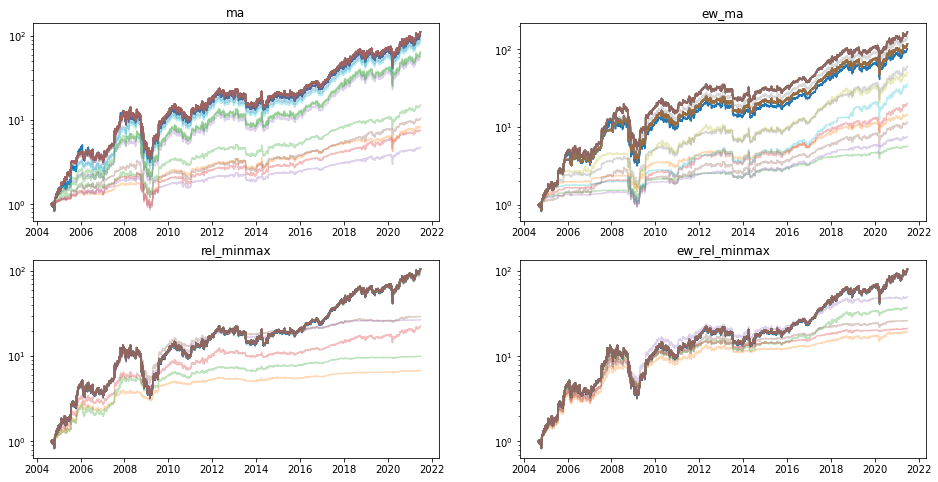

Saving ISRG params...



----------------------------------------------------------------------
                                 JD
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 3.0661283851679704
Refitting current best...
Current best ma returns: 3.588236105599102
Fraction Invested: 0.9972675882211272
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 3.625303170430967
Invested: 0.9972675882211272
New best: 3.625428285245519
Invested: 0.9972675882211272
New best: 3.625854513914347
Invested: 0.9972675882211272
New best: 3.625978994041046
Invested: 0.9972675882211272
New best: 3.626637196616489
Invested: 0.9972675882211272
New best: 3.6267263621096677
Invested: 0.9972675882211272
New best: 3.626789591378901
Invested: 0.9972675882211272
Round: 50


Beginning ew_ma method...
--------------------------------------------------


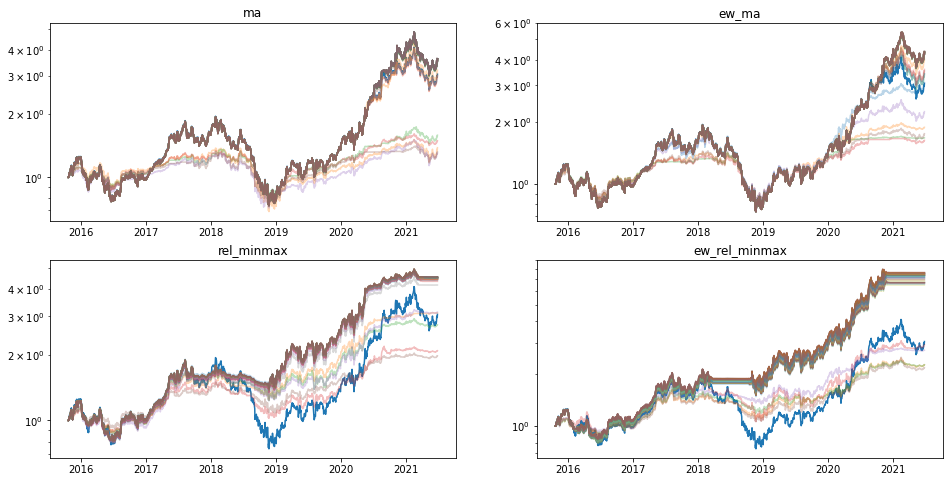

Saving JD params...



----------------------------------------------------------------------
                                 ^NYA
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 9.627005160080088
Refitting current best...
Current best ma returns: 12.31212426699551
Fraction Invested: 0.999887676903952
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 12.312352889506228
Invested: 0.999887676903952
New best: 12.312356243949706
Invested: 0.9998966730672681
New best: 12.312384050690062
Invested: 0.9999712544571147
New best: 12.324981248019345
Invested: 0.9999712544571147
New best: 12.324988712971784
Invested: 0.9999912582620449
Round: 50


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 9.627005160080088
Refitting current best...
Current best ew_ma returns: 9.738302817335276
Fra

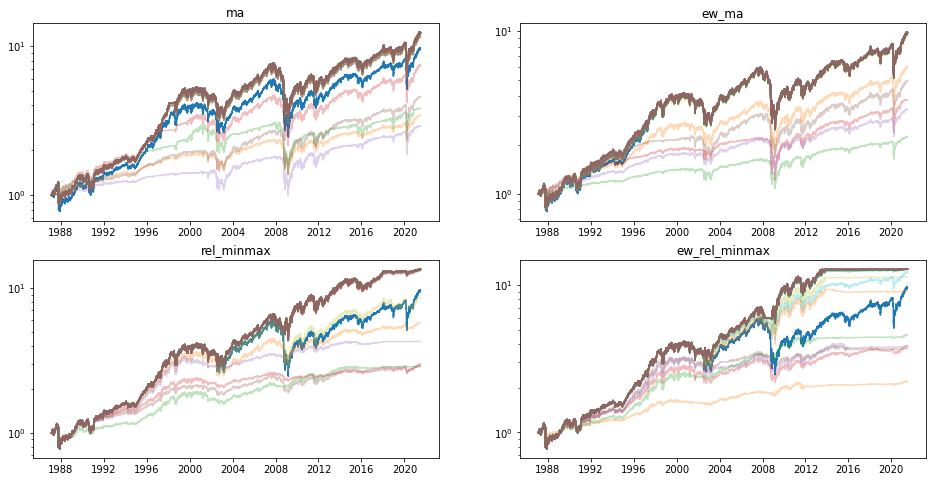

Saving ^NYA params...


In [31]:
N_RAND = 5
N_ADJ = 50

for stock in batch:
    print('\n\n')
    print('-' * 70)
    print(' ' * 32, stock)
    print('-' * 70)
    best_params, best_returns = read_best_params(stock)
    stock_data = get_stock_data(stock, data)
    qp = QPercent(stock_data, 
                  N_CUTS, 
                  best_param_set=best_params, 
                  best_returns=best_returns, 
                  sd=SD)
    qp.run_sims(N_RAND, N_ADJ)
    best = get_best_param_set(qp)
    save_best_param_set(best, stock)

In [32]:
def get_summary(stocks):
    for stock in stocks:
        try:
            with open(f'{DATA}/{stock}_best.json', 'r') as f:
                best = json.load(f)
            best_method = None
            best_return = 0
            best_pct = None
            for key in best:
                ret = best[key]['best_return']
                if ret > best_return:
                    best_return = ret
                    best_method = key
                    best_pct = best[key]['pct']
            print(f'\n{stock}:\n  Best Return: {best_return} '
                  f'({best_method})\n  {100 * best_pct:.2f}% in')
        except FileNotFoundError:
            print('No data for', stock)
            continue
        except:
            print('Bad Data for', stock)
            continue

In [34]:
ALL = SYMBOLS + INDICES
#get_summary(ALL)
get_summary(batch)


FSLY:
  Best Return: 7.986119296727619 (rel_minmax)
  93.14% in

FUV:
  Best Return: 10.573605263198777 (rel_minmax)
  9.36% in

GH:
  Best Return: 3.657762202681425 (rel_minmax)
  0.17% in

GMED:
  Best Return: 4.038789686142046 (ew_rel_minmax)
  99.29% in
Bad Data for INTG

ISRG:
  Best Return: 167.67950553895284 (ew_ma)
  99.18% in

JD:
  Best Return: 7.643886381909157 (ew_rel_minmax)
  0.23% in

^NYA:
  Best Return: 13.507563314280768 (rel_minmax)
  12.41% in


In [ ]:
!say qp is dunzo